# Regression

## Data Preparation

In [60]:
import pandas as pd
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [61]:
print(houses.columns)
print(houses)

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')
       median_house_value  median_income  housing_median_age  total_rooms  \
0                452600.0         8.3252                41.0        880.0   
1                358500.0         8.3014                21.0       7099.0   
2                352100.0         7.2574                52.0       1467.0   
3                341300.0         5.6431                52.0       1274.0   
4                342200.0         3.8462                52.0       1627.0   
...                   ...            ...                 ...          ...   
20635             78100.0         1.5603                25.0       1665.0   
20636             77100.0         2.5568                18.0        697.0   
20637             92300.0         1.7000                17.0       2254.0   
20638             84700.0         1.867

### Preprocessing

In [62]:
# Separate features and target variable
X = houses.drop('median_house_value', axis=1)
y = houses['median_house_value']

Preprocessing and data exploration is an important step of any machine learning process. Here I have prepared the data to be passed to the models by identifying and separating the target value and scaling the values to normalise them between the values of 0 and 1. Feature selection is then carried out using the F-statistic, selecting 4 features that are the most closely related to median house value. This will increase the performance of my model and increase dimensionality, by selecting the most relevant features.

### Feature Selection

In [63]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection using SelectKBest with f_regression
k_best = 4  
selector = SelectKBest(f_regression, k=k_best)
X_selected = selector.fit_transform(X, y)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['median_income', 'housing_median_age', 'total_rooms', 'latitude'], dtype='object')


### Feature Normalisation

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Feature Normalization on the selected features
scaler = MinMaxScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Print the normalized selected features
normalised_data = pd.DataFrame(X_selected_scaled, columns=selected_features)
print(normalised_data)

       median_income  housing_median_age  total_rooms  latitude
0           0.539668            0.784314     0.022331  0.567481
1           0.538027            0.392157     0.180503  0.565356
2           0.466028            1.000000     0.037260  0.564293
3           0.354699            1.000000     0.032352  0.564293
4           0.230776            1.000000     0.041330  0.564293
...              ...                 ...          ...       ...
20635       0.073130            0.470588     0.042296  0.737513
20636       0.141853            0.333333     0.017676  0.738576
20637       0.082764            0.313725     0.057277  0.732200
20638       0.094295            0.333333     0.047256  0.732200
20639       0.130253            0.294118     0.070782  0.725824

[20640 rows x 4 columns]


### Rationale

As can be seen above the data has been normalised using the Min Max Scaler. On top of this, The selected features from my feature selection process are 'median_income', 'housing_median_age', 'total_rooms', 'latitude', as determined by f_regression. Feature selection is employed to enhance the predictive performance and interpretability of the model by choosing the most relevant features. In this case, the f_regression test with SelectKBest is utilised to select the top k features based on their correlation with the target variable, median house value. My normalisation ensures that all features are on a consistent scale. This aids in preventing dominance by certain features promoting improved convergence during model training. Together, these steps contribute to creating a streamlined and informative dataset, which will lead to more accurate and robust regression models.

## Train, Validate, Test Split

### Performing Data Split

In [65]:
from sklearn.model_selection import train_test_split

# Splitting the data into training, validation, and test sets
# 80-10-10 split
X_train, X_temp, y_train, y_temp = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# X_train, y_train are the training data, 
# X_val, y_val are the validation data, 
# X_test, y_test are the test data

### Rationale

The decision to partition the houses dataset into training, validation, and test sets is a fundamental aspect of creating the machine learning model development strategy. This strategic split allows us to systematically evaluate and optimise the models on distinct subsets of the data. The dataset is divided into three parts:

**Training Set (80% of the data):** This sizable portion is dedicated to training the 3 machine learning models. During this phase, the models learn intricate patterns, relationships, and features inherent in the houses dataset. The substantial training set size enhances the models' capacity to capture complex patterns, facilitating superior generalisation to unseen data.

**Validation Set (10% of the data):** Following the training phase, the models will be evaluated on a distinct dataset that hasn't been exposed to the training process—the validation set. This set plays a crucial role in validating how optimal the model is and identifying potential issues like overfitting. Adjustments based on the model's performance on the validation set are made to ensure robust generalisation to new, unseen data.

**Test Set (10% of the data):** The test set serves as the ultimate benchmark for the final model evaluation. Representing a completely unseen dataset, it provides an unbiased assessment of how well the 3 models will perform in real-world scenarios when faced with new, unseen house data. This ensures that our predictions are reliable and applicable beyond the training and validation datasets.

By meticulously adhering to this dataset split, I establish a comprehensive framework for developing and assessing three distinct machine learning models tailored to predict house median prices. This process guarantees that our models are trained on a diverse dataset, refined on a validation set, and rigorously evaluated on a test set, collectively contributing to a robust and reliable assessment of their generalisation performance for accurate house price predictions.

## Metric Selection

**Mean Squared Error (MSE):** MSE is a widely adopted metric for regression tasks, capturing the average squared difference between predicted and actual values. It offers a comprehensive evaluation of the model's accuracy, with larger errors contributing more significantly to the score.

**Root Mean Squared Error (RMSE):** RMSE, derived from MSE, provides a more interpretable metric by representing the average magnitude of prediction errors in the original units of the target variable (house median prices). This allows for a nuanced understanding of the model's performance.

**Mean Absolute Error (MAE):** MAE calculates the average absolute differences between predicted and actual values, offering insight into the average magnitude of errors without the influence of squared terms. This makes it less sensitive to outliers compared to MSE.

**R-squared Score (R2):** The R-squared score measures the proportion of the variance in the target variable that is predictable from the independent variables. A higher R-squared score indicates a better fit of the model to the data, providing a valuable summary of overall model performance.

The rationale for choosing these metrics lies in their collective ability to comprehensively quantify prediction accuracy. MSE and RMSE emphasize larger errors, while MAE provides a measure of average magnitude, and R2 assesses the overall explanatory power of the model. This holistic approach ensures a nuanced evaluation, enabling you to make informed decisions about the effectiveness of your regression models in predicting house median prices.

## Machine Learning Model 1

### Linear Regression

Training Set Metrics:
MSE: 6349093239.162486
RMSE: 79681.19752590623
MAE: 59516.46744886414

Validation Set Metrics:
MSE: 6501269082.397353
RMSE: 80630.44761377276
MAE: 60097.275031346784

Test Set Metrics:
MSE: 6421699037.049073
RMSE: 80135.50422284166
MAE: 59779.033026169636


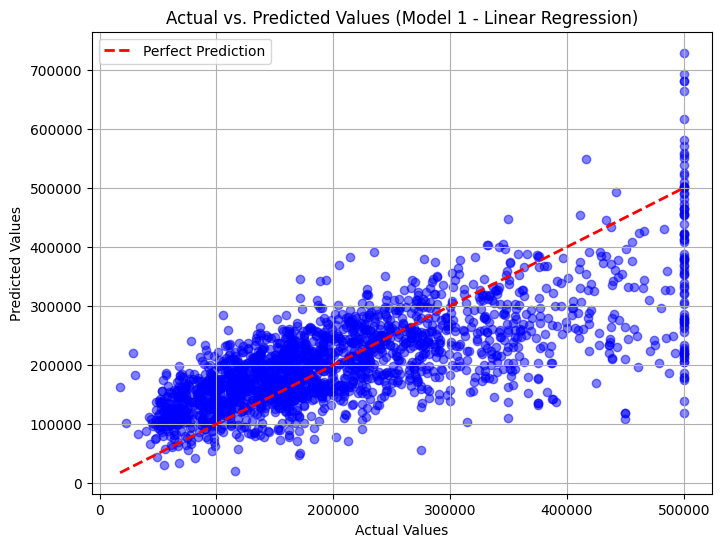

R-Squared Score =  0.5072995713187876


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Model 1: Linear Regression
model1 = LinearRegression()

# Train the model on the training set
model1.fit(X_train, y_train)

# Predict on the training set
y_pred_train1 = model1.predict(X_train)

# Evaluate performance on the training set
mse_train1 = mean_squared_error(y_train, y_pred_train1)
rmse_train1 = np.sqrt(mse_train1)  # Calculate RMSE from MSE
mae_train1 = mean_absolute_error(y_train, y_pred_train1)

print(f"Training Set Metrics:")
print(f"MSE: {mse_train1}")
print(f"RMSE: {rmse_train1}")
print(f"MAE: {mae_train1}")

# Predict on the validation set
y_pred_val1 = model1.predict(X_val)

# Evaluate performance on the validation set
mse_val_model1 = mean_squared_error(y_val, y_pred_val1)
rmse_val_model1 = mean_squared_error(y_val, y_pred_val1, squared=False)
mae_val_model1 = mean_absolute_error(y_val, y_pred_val1)

# Predict on the test set 
y_pred_test1 = model1.predict(X_test)

# Evaluate performance on the test set
mse_model1 = mean_squared_error(y_test, y_pred_test1)
rmse_model1 = mean_squared_error(y_test, y_pred_test1, squared=False)
mae_model1 = mean_absolute_error(y_test, y_pred_test1)

print("\nValidation Set Metrics:")
print(f"MSE: {mse_val_model1}")
print(f"RMSE: {rmse_val_model1}")
print(f"MAE: {mae_val_model1}")

# Predict on the test set  
y_pred_test1 = model1.predict(X_test)

# Evaluate performance on the test set
mse_model1 = mean_squared_error(y_test, y_pred_test1)
rmse_model1 = mean_squared_error(y_test, y_pred_test1, squared=False)
mae_model1 = mean_absolute_error(y_test, y_pred_test1)

print("\nTest Set Metrics:")
print(f"MSE: {mse_model1}")
print(f"RMSE: {rmse_model1}")
print(f"MAE: {mae_model1}")

# Scatter plot of actual vs. predicted values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test1, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Values (Model 1 - Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared score for the test set
print("R-Squared Score = ", model1.score(X_test, y_test))


### Rationale


The choice of Linear Regression as Model 1 stems from the fact it can provide a foundational understanding of linear relationships within the dataset and serve as an insightful starting point. "Linear Regression plays a fundamental role in statistical modeling", Su, Yan, and Tsai (2012). Despite its straightforward nature, Linear Regression captures fundamental patterns and establishes a baseline for more intricate models. The assessment of Model 1's predictive ability on both the test and validation sets reveals noteworthy performance metrics. In the test set, the MSE of approximately 6.42 billion signifies the average squared difference between predicted and actual prices, with lower values being desirable for accurate predictions. The RMSE, around 80,135, provides insight into the average magnitude of prediction errors in the target variable, aiding interpretability. The MAE, approximately 59,779, demonstrates errors without the influence of squared terms, offering an alternative perspective on prediction accuracy. The scatter plot visually supports the model's competence, particularly for lower prices, but a widening gap as prices increase suggests limitations in capturing complex patterns associated with expensive houses, aligning with the inherent struggle of linear models with non-linear relationships. The validation set metrics echo similar trends, emphasising Model 1's reasonable baseline performance. The congruence in trends between the training and validation sets suggests a balanced model that doesn't exhibit overfitting tendencies. However, the marginal increase in error metrics on the validation set signals potential limitations in accurately predicting higher-priced houses. The MSE on the validation set is approximately 6.50 billion, the RMSE is around 80,630, and the MAE is about 60,097. This insight is invaluable for model refinement, reinforcing the need for more sophisticated models to navigate non-linear patterns within the dataset effectively.The R-Squared score of around 0.5072, shows that the model accounts for about 50.721% of the variability in house prices, and the remaining 49.28% is attributed to other factors or unaccounted variability. This is an average score and can definitely be improved in further models. Overall, while Model 1 excels within certain price ranges, its limitations underscore the importance of exploring advanced models for enhanced performance.

## Machine Learning Model 2

Training Set Metrics:
MSE: 681320459.2280201
RMSE: 26102.115991390816
MAE: 18262.498588299422

Validation Set Metrics:
MSE: 5064248406.517768
RMSE: 71163.53284174253
MAE: 49366.23026162791

Test Set Metrics:
MSE: 4977300543.635911
RMSE: 70549.98613490941
MAE: 48975.0007122093


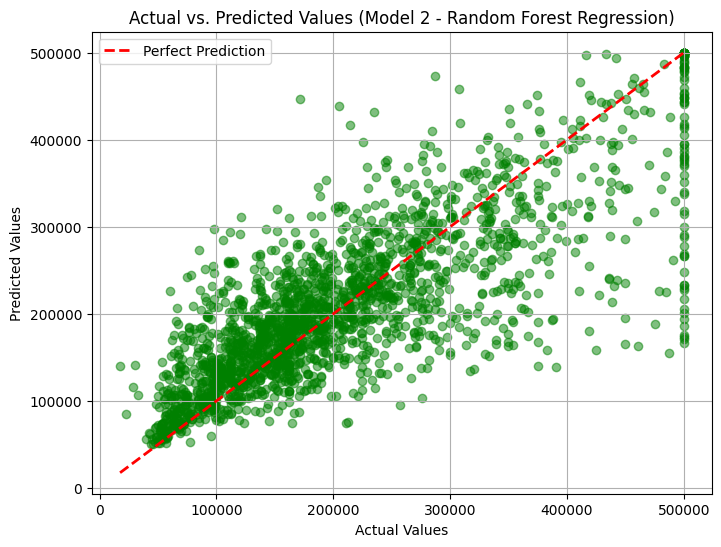

R-Squared Score =  0.6181200493239645


In [67]:
from sklearn.ensemble import RandomForestRegressor

# Model 2: Random Forest Regression
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
model2.fit(X_train, y_train)

# Predict on the training set
y_pred_train2 = model2.predict(X_train)

# Evaluate performance on the training set
mse_train_model2 = mean_squared_error(y_train, y_pred_train2)
rmse_train_model2 = mean_squared_error(y_train, y_pred_train2, squared=False)
mae_train_model2 = mean_absolute_error(y_train, y_pred_train2)

print("Training Set Metrics:")
print(f"MSE: {mse_train_model2}")
print(f"RMSE: {rmse_train_model2}")
print(f"MAE: {mae_train_model2}")

# Predict on the validation set
y_pred_val2 = model2.predict(X_val)

# Evaluate performance on the validation set
mse_val_model2 = mean_squared_error(y_val, y_pred_val2)
rmse_val_model2 = mean_squared_error(y_val, y_pred_val2, squared=False)
mae_val_model2 = mean_absolute_error(y_val, y_pred_val2)

print("\nValidation Set Metrics:")
print(f"MSE: {mse_val_model2}")
print(f"RMSE: {rmse_val_model2}")
print(f"MAE: {mae_val_model2}")

# Predict on the test set
y_pred_test2 = model2.predict(X_test)

# Evaluate performance using selected metrics
mse_model2 = mean_squared_error(y_test, y_pred_test2)
rmse_model2 = mean_squared_error(y_test, y_pred_test2, squared=False)
mae_model2 = mean_absolute_error(y_test, y_pred_test2)

print(f"\nTest Set Metrics:")
print(f"MSE: {mse_model2}")
print(f"RMSE: {rmse_model2}")
print(f"MAE: {mae_model2}")

# Scatter plot of actual vs. predicted values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test2, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Values (Model 2 - Random Forest Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared score for the test set
print("R-Squared Score = ", model2.score(X_test, y_test))

### Rationale


Model 2, employing Random Forest Regression, introduces a more sophisticated approach to capturing the intricate patterns within the houses dataset. Segal (2004) explained that good performance can be acheived through this type of regression. The training set metrics indicate that the model fits well to the training data, with a relatively low Mean Squared Error (MSE) of approximately 681.32 million, Root Mean Squared Error (RMSE) of around 26,102, and Mean Absolute Error (MAE) of approximately 18,262. These values suggest that the model effectively learns and replicates the patterns present in the training set. However, when evaluating the model on the validation and test sets, we observe a notable increase in error metrics. The validation set exhibits an MSE of approximately 5.06 billion, RMSE of around 71,163, and MAE of approximately 49,366. Similarly, on the test set, the MSE is about 4.98 billion, RMSE is around 70,550, and MAE is approximately 48,975. While these metrics are higher than those observed on the training set, they still provide insights into the model's performance. The benefits of Random Forest lie in its ability to handle non-linear relationships and complex interactions among features. The algorithm constructs multiple decision trees and combines their predictions, providing robustness and improved accuracy. The scatter plot depicting the actual vs. predicted values, much like model 1,  aligns closely with the perfect prediction at the start. This shows that the model also captures the lower price ranges well. However, the widening spread as prices increase indicates challenges in accurately predicting higher-priced houses, echoing the complexity inherent in capturing non-linear relationships. However, the points still trend towards the perfect prediction. The R-Squared score of around 0.6181, indicates that approximately 61.81% of the variance in the house price can be explained by the features included in the model, indicating a moderate level of predictive performance. In summary, Model 2 showcases enhanced predictive capabilities on the training set, leveraging the flexibility of Random Forest to capture intricate patterns. However, the widening gap in predictions for higher values on the scatter plot and the increased error metrics on the validation and test sets highlight challenges in generalising to unseen data, especially in predicting higher-priced houses. Further improvement of the model and exploration of advanced techniques may be warranted to address these challenges and improve overall predictive performance.

## Machine Learning Model 3

Training Set Metrics:
MSE: 1737189122.7996488
RMSE: 41679.60079942764
MAE: 30084.66904075631

Validation Set Metrics:
MSE: 4947047317.170218
RMSE: 70335.24946405052
MAE: 49068.42299348376

Test Set Metrics:
MSE: 4554093700.372545
RMSE: 67484.02551991504
MAE: 47866.40122145062


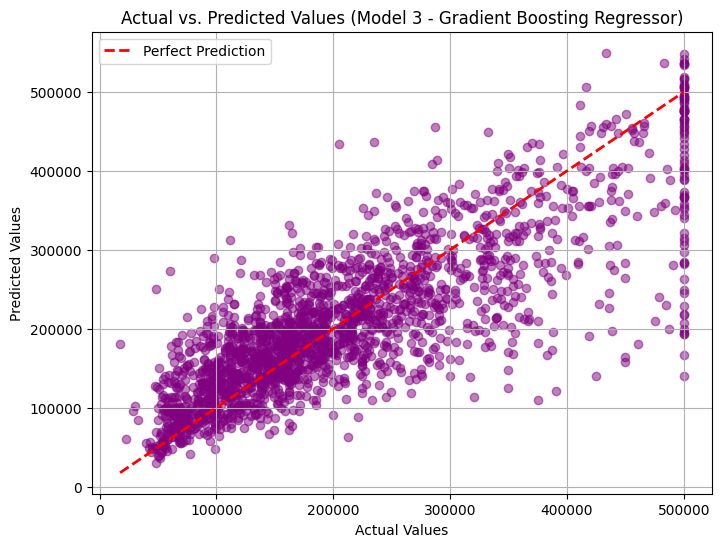

R-Squared Score =  0.6505903024288966


In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Model 3: Gradient Boosting Regressor
model3 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model on the training set
model3.fit(X_train, y_train)

# Predict on the training set
y_pred_train3 = model3.predict(X_train)

# Evaluate performance on the training set
mse_train_model3 = mean_squared_error(y_train, y_pred_train3)
rmse_train_model3 = mean_squared_error(y_train, y_pred_train3, squared=False)
mae_train_model3 = mean_absolute_error(y_train, y_pred_train3)

print("Training Set Metrics:")
print(f"MSE: {mse_train_model3}")
print(f"RMSE: {rmse_train_model3}")
print(f"MAE: {mae_train_model3}")

# Predict on the validation set
y_pred_val3 = model3.predict(X_val)

# Evaluate performance on the validation set
mse_val_model3 = mean_squared_error(y_val, y_pred_val3)
rmse_val_model3 = mean_squared_error(y_val, y_pred_val3, squared=False)
mae_val_model3 = mean_absolute_error(y_val, y_pred_val3)

print("\nValidation Set Metrics:")
print(f"MSE: {mse_val_model3}")
print(f"RMSE: {rmse_val_model3}")
print(f"MAE: {mae_val_model3}")

# Predict on the test set
y_pred_test3 = model3.predict(X_test)

# Evaluate performance on the test set
mse_model3 = mean_squared_error(y_test, y_pred_test3)
rmse_model3 = mean_squared_error(y_test, y_pred_test3, squared=False)
mae_model3 = mean_absolute_error(y_test, y_pred_test3)

print("\nTest Set Metrics:")
print(f"MSE: {mse_model3}")
print(f"RMSE: {rmse_model3}")
print(f"MAE: {mae_model3}")

# Scatter plot of actual vs. predicted values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test3, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Values (Model 3 - Gradient Boosting Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Print the R-squared score for the test set
print("R-Squared Score = ", model3.score(X_test, y_test))

### Rationale

Gradient Boosting Regressor (Model 3) was selected due to its ability to handle complex relationships within the houses dataset. The choice of hyperparameters, specifically setting the number of estimators to 500, learning rate to 0.1, and maximum depth to 5, aimed to strike a balance between model complexity and predictive performance. I iteratively tweaked these parameters to try and result in the best score, considering the trade-off between training efficiency and capturing patterns. Assessing the model's performance on the training set reveals promising results, with an MSE of approximately 1.74 billion, RMSE of around 41,679, and MAE of about 30,085. These metrics indicate a considerable reduction in prediction errors compared to the initial model, showcasing the impact of hyperparameter tuning. The validation set metrics, with an MSE of around 4.95 billion, RMSE of approximately 70,335, and MAE of about 49,068, reflect a good generalisation of the model to new, unseen data. On the test set, the model maintains its competence, with an MSE of about 4.55 billion, RMSE of around 67,484, and MAE of approximately 47,866, showing that my model would be applicable beyond its current scope. The R-squared score of 0.65 emphasises the model's ability to explain variance in the target variable of house median price. The scatter plot illustrates a relatively close alignment between actual and predicted values, particularly for lower to mid-range house prices. The Gradient Boosting Regressor's strengths lie in its capability to handlecapture complex patterns, and mitigate overfitting. Cai et al. (2020) utilised gradient boosting regression in the field of applied energy - There are many applications to this type of regression and it can be very beneficial for prediction models. In summary, the selection of the Gradient Boosting Regressor, coupled with careful hyperparameter tuning, resulted in a robust model that adeptly predicts house median prices, especially in the context of non-linear relationships within the dataset.

## Comparison

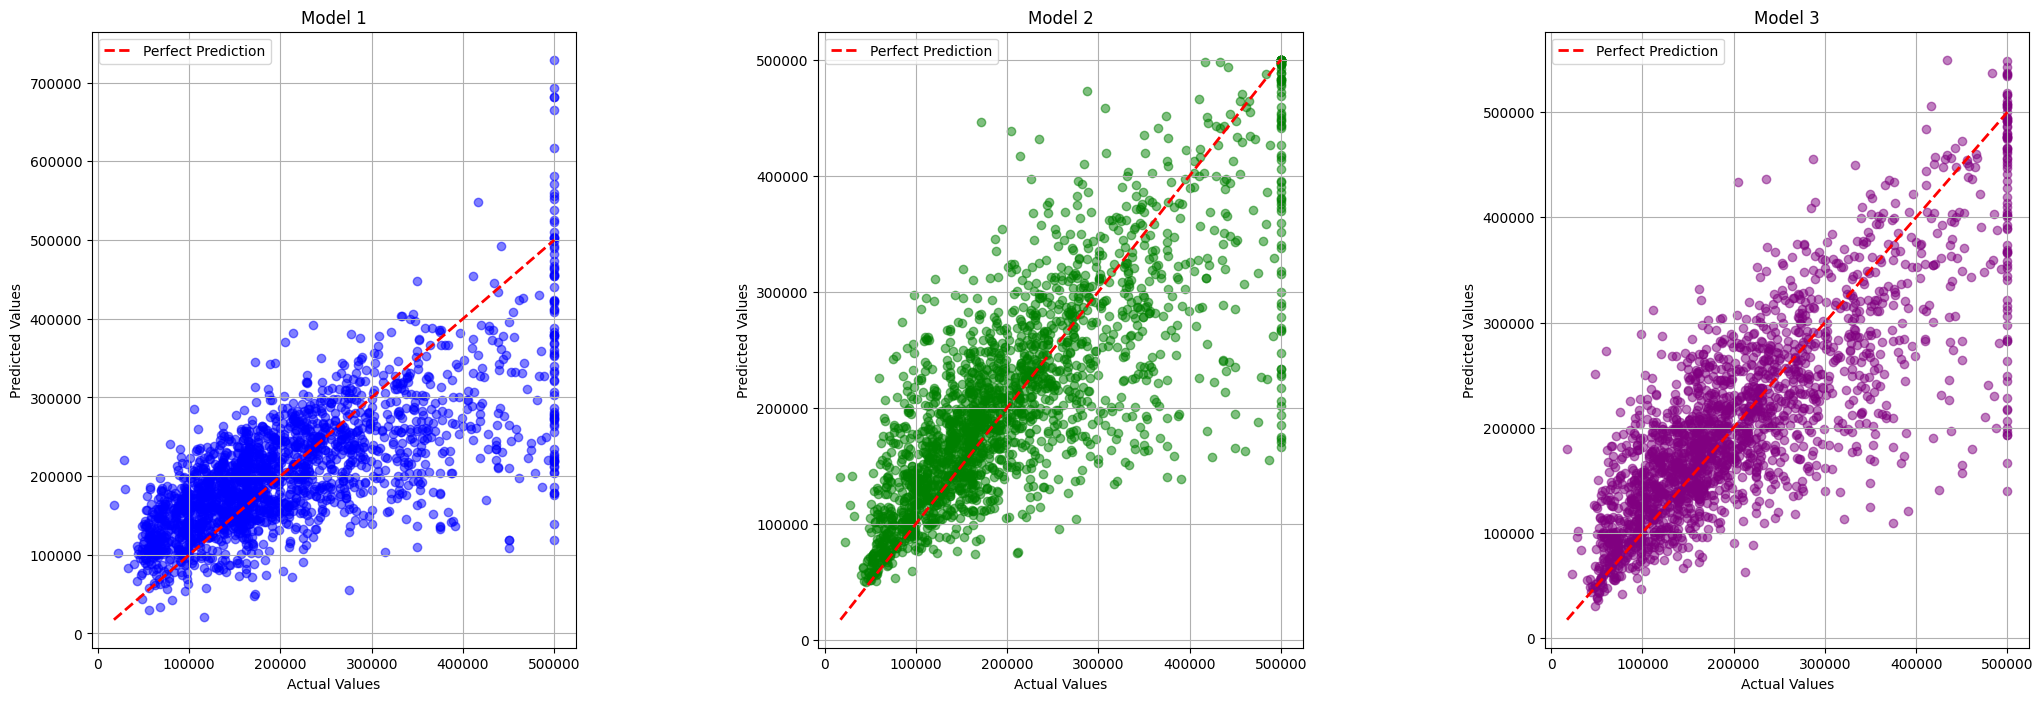

Model 1 R-Squared Score =  0.5072995713187876 ,  Model 2 R-Squared Score =  0.6181200493239645 ,  Model 3 R-Squared Score =  0.6505903024288966


In [69]:
plt.figure(figsize=(25, 8)) 

# Scatter plot for Model 1
plt.subplot(1, 3, 1) 
plt.scatter(y_test, y_pred_test1, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Model 1')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Scatter plot for Model 2
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test2, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Model 2')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Scatter plot for Model 3
plt.subplot(1, 3, 3) 
plt.scatter(y_test, y_pred_test3, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Model 3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.5)  
plt.show()

# Print the R-squared score for the test set
print("Model 1 R-Squared Score = ", model1.score(X_test, y_test), ", ", "Model 2 R-Squared Score = ", model2.score(X_test, y_test), ", ", "Model 3 R-Squared Score = ", model3.score(X_test, y_test))

All three models implemented provide valuable insights into the houses dataset, each offering varying levels of predictive performance.

Model 1, based on Linear Regression, establishes a fundamental understanding of linear relationships and provides a straightforward baseline for house price prediction. However, its limitations are evident in the scatter plot and metrics, especially for higher-priced houses, where non-linear patterns prove challenging. The model exhibits an MSE of approximately 6.42 billion on the test set, reflecting the average squared difference between predicted and actual prices.

Model 2, employing Random Forest Regression, enhances predictive ability compared to Model 1, particularly in the middle price range. While it mitigates some of the non-linearity issues, the scatter plot reveals a more varied spread across the middle to the high-end of the graph. This signifies the struggle with capturing more complex relationships. The test set MSE for Model 2 is approximately 4.98 billion, demonstrating the higher performance.

Model 3, utilising the Gradient Boosting Regressor with carefully tuned hyperparameters, emerges as the standout performer. It showcases superior predictive ability, shown in the lowest RMSE and MAE across all models. The scatter plot for Model 3 underscores its effectiveness, displaying a relatively close prediction for houses with higher prices. Naturally, this model also shares problems with its predecessors, as the graph shows a divergence towards the higher values. But ona while, Model 3, is the most accurate as demonstrated by its test set MSE of approximately 4.55 billion. This makes it a compelling choice for accurate predictions

When considering the advantages and drawbacks of the three implemented models on the houses dataset, distinct patterns emerge. Linear Regression (Model 1) offers simplicity, serving as a valuable baseline. Random Forest Regression (Model 2) leverages ensemble learning for improved accuracy but struggles with capturing certain non-linear patterns. Gradient Boosting Regressor (Model 3) strikes a balance between complexity and accuracy.

## Conclusion

In conclusion, the selection of the most suitable model for predicting house prices depends on the specific needs and trade-offs within the dataset. Linear Regression gives a passable prediction and serves as an accessible entry point. While providing valuable insights, its limitations become apparent, particularly in capturing complex relationships. Random Forest Regression introduces ensemble learning, which improves predictive accuracy, especially within a certain price range. However, its struggles with various patterns are evident, and while it outperforms Linear Regression, there is room for improvement. The standout performer, Gradient Boosting Regressor, demonstrates superior predictive ability. This model's performance is  more consistent across various house prices, making it the preferred choice for accurate predictions within the houses dataset. Adjusting the parameters allowed for a personalised process that increased the power of this model, mitigating overfitting and capturing intricate patterns better than the other models.

The efficacy of the analysis metrics, including MSE, RMSE, MAE, and R2 proves invaluable in evaluating model performance. Lower MSE and RMSE values are indicative of better predictive accuracy, aligning with the goal of minimizing prediction errors. The MAE complements this by providing insights into the average magnitude of errors, offering a more nuanced perspective on prediction accuracy. R2, despite being a slighttly less strong metric to use for performance testing and comparison, allows for a wuick and digestible statistic for the score of a model.

In addition to the model selection and metric evaluation, the exploration of scatter plots enriches the understanding of each model's strengths and weaknesses, particularly in handling different price ranges. These visualizations serve as powerful tools for assessing predictive performance, emphasising the need for models that can can predict effectively.

The choice of the most appropriate model must balance comprehension with predictive accuracy, tailored to the houses dataset. While the other models provide decently accurate estimations, Gradient Boosting Regressor emerges as the preferred model, offering a sophisticated balance between complexity and accuracy. The meticulous analysis metrics and visualisations contribute to a comprehensive understanding of each model's performance within the context of predicting house prices. In future, exploring alternative model types or building upon the current ones by tweaking parameters or using different methodologies for feature selection or data preparation may further enhance predictive accuracy, providing opportunities for refined models that better capture the intricate patterns within the dataset and contribute to improved house price predictions.


# References

#### Newcastle University., (2023) 'Predictive Analytics Computer Vision & AI - CSC3831'. Newcastle University: School of Computing.
#### Su, X., Yan, X. and Tsai, C.L., 2012. Linear regression. Wiley Interdisciplinary Reviews: Computational Statistics, 4(3), pp.275-294.
#### Segal, M.R., 2004. Machine learning benchmarks and random forest regression.
#### Cai, J., Xu, K., Zhu, Y., Hu, F. and Li, L., 2020. Prediction and analysis of net ecosystem carbon exchange based on gradient boosting regression and random forest. Applied energy, 262, p.114566.